In [1]:
import os 
os.chdir("F://buffalo//buffalo project//time_series//nottem data")
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import statsmodels as sm
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from stldecompose import decompose

In [2]:
data= pd.read_csv("nottem.csv",header =0 ,names=["Month","Temp"],parse_dates=[0],index_col=0)

In [3]:
data.head()

,Temp
Month,
1,40.6
2,40.8
3,44.4
4,46.7
5,54.1


In [4]:
data_series=pd.Series((data['Temp']).values,index = pd.date_range('1920-01-31',periods =240,freq='M'))

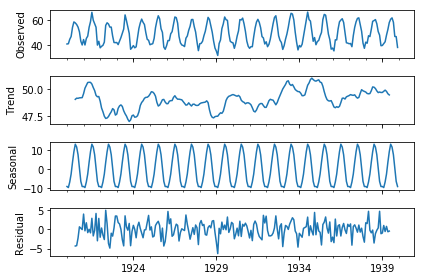

In [5]:
decomposed = seasonal_decompose(data_series)
dplot = decomposed.plot()

In [6]:
stl = decompose(data_series,period =12)
stl.trend.head()

1920-01-31    48.616042
1920-02-29    48.612980
1920-03-31    48.609917
1920-04-30    48.606960
1920-05-31    48.604002
Freq: M, dtype: float64

Not  na in starting so better than previous method also form potting we can see that there is slight trend but it is very min and in between 48-49

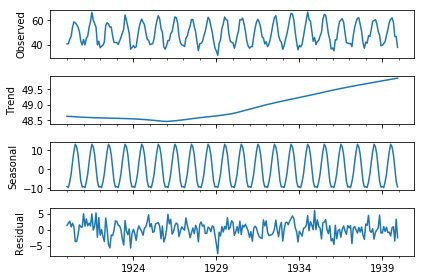

In [7]:
vis=stl.plot()

# Seasonal adjustment

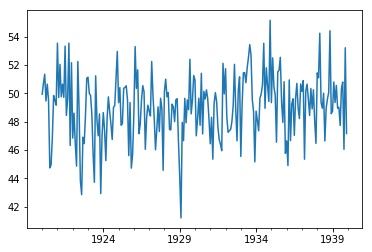

In [8]:
seasonal_adjusted =  data_series - decomposed.seasonal
seasonal_adjusted.plot()

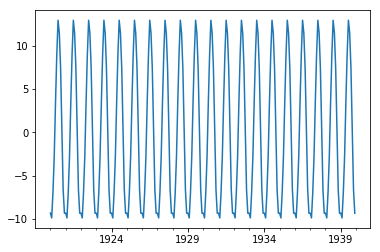

In [9]:
decomposed.seasonal.plot()

# Decompossed time series to create forecast

In [10]:
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,drift,seasonal_naive,mean)

In [11]:
stl = decompose(data_series,period =12)
fcast = forecast(stl,seasonal=True, fc_func= seasonal_naive,steps=12)
fcast

,seasonal_naive+seasonal
1940-01-31,40.508501
1940-03-02,40.006367
1940-04-02,43.014288
1940-05-03,47.111975
1940-06-03,53.384711
1940-07-04,58.867469
1940-08-04,62.730247
1940-09-04,61.296523
1940-10-05,57.259356
1940-11-05,50.277304


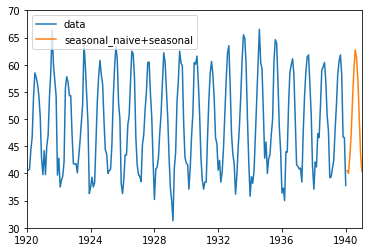

In [12]:
plt.plot(data_series,label = 'data')
plt.plot(fcast,label=fcast.columns[0])
plt.xlim('1920','1941')
plt.ylim(30,70)
plt.legend()

# applying holtwinter 

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
exp_model =ExponentialSmoothing(data_series,seasonal="additive",seasonal_periods=12)


In [14]:
fit= exp_model.fit()
# alpha smothheing   for trend and gamms for seasonality
fit.params['smoothing_level']


0.031012984092332472

In [15]:
fit.params['smoothing_seasonal']
# as we casn see there was no seasonality therfore it is showing 0

0.0

In [16]:
model_holt =fit.predict(start =240, end =251)

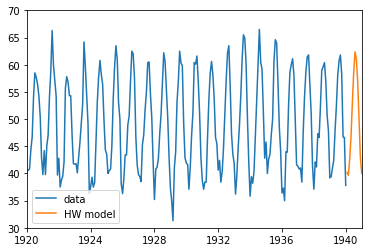

In [17]:
plt.plot(data_series,label ="data")
plt.plot(model_holt,label ="HW model")
plt.xlim('1920','1941')
plt.ylim(30,70)
plt.legend()

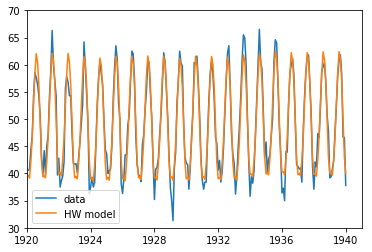

In [18]:
plt.plot(data_series,label ="data")
plt.plot(fit.fittedvalues,label ="HW model")
plt.xlim('1920','1941')
plt.ylim(30,70)
plt.legend()